# PDS: Assignment 1

### Deadline: January 9 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted  For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment1.ipynb (ex. Mussalim_Kaisar_1905_Assignment1.ipynb)

## Q1 (1 point)
Read video games sales data from vgsales.csv file. This dataset contains a list of video games with sales greater than 100,000 copies. Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

**Tasks to do:**
1. Using your favorite visualization library build histograms and boxplots for NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales? 
2. What is the average sales for each region? 
3. What is the standard deviation for each region?
4. How many outliers (using IQR rule) we have in Global_Sales column?
5. What is the difference between mean and median values in Global_Sales column? 
6. Remove outliers and plot histogram and boxplot again. 
7. What is the difference between mean and median now?
8. In your opinion what happened, why difference between mean and median have changed?

*Hint: use pandas to read dataset.*

In [327]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


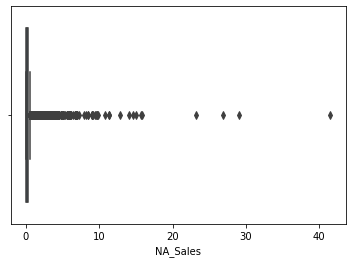

In [510]:
#Task 1
sns.boxplot(x = df['NA_Sales'])

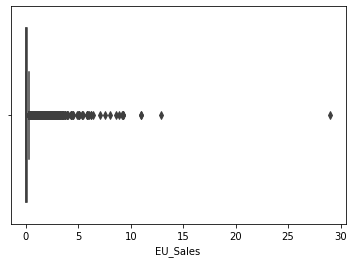

In [511]:
sns.boxplot(x = df['EU_Sales'])

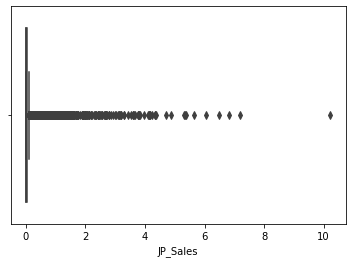

In [514]:
sns.boxplot(x = df['JP_Sales'])

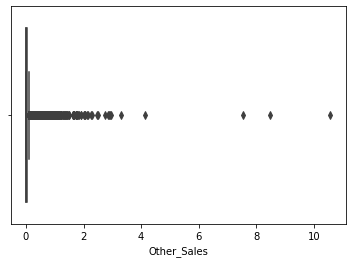

In [513]:
sns.boxplot(x = df['Other_Sales'])

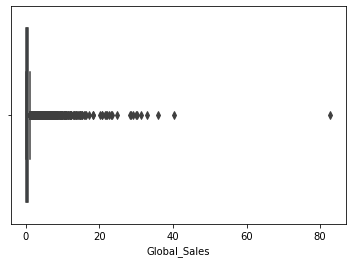

In [512]:
sns.boxplot(x = df['Global_Sales'])

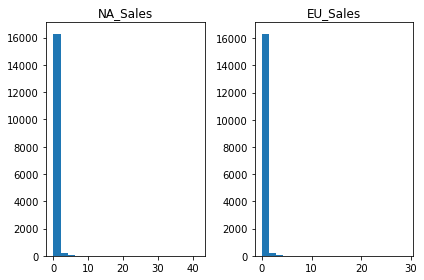

In [497]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

axs[0].hist(df['NA_Sales'], bins = 20)
axs[0].set_title('NA_Sales')

axs[1].hist(df['EU_Sales'], bins = 20)
axs[1].set_title('EU_Sales')

plt.show()

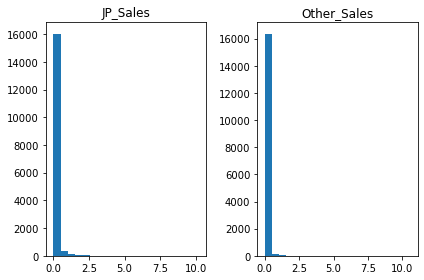

In [498]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

axs[0].hist(df['JP_Sales'], bins = 20)
axs[0].set_title('JP_Sales')

axs[1].hist(df['Other_Sales'], bins = 20)
axs[1].set_title('Other_Sales')

plt.show()

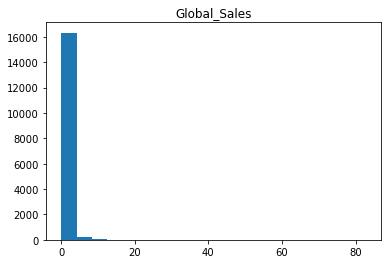

In [506]:
plt.hist(df['Global_Sales'], bins=20) 
plt.title('Global_Sales')
plt.show()

In [289]:
#Task 2
print('Average Sales in North America:', df['NA_Sales'].mean())
print('Average Sales in Europe:', df['EU_Sales'].mean())
print('Average Sales in Japan:', df['JP_Sales'].mean())
print('Average Sales in the rest of the world:', df['Other_Sales'].mean())

Average Sales in North America: 0.26466742981084057
Average Sales in Europe: 0.1466520062658483
Average Sales in Japan: 0.07778166044101108
Average Sales in the rest of the world: 0.048063019640913515


In [437]:
#Task 3
print('Standard deviation Sales in North America:', np.std(df['NA_Sales']))
print('Standard deviation Sales in Europe:', np.std(df['EU_Sales']))
print('Standard deviation Sales in Japan:', np.std(df['JP_Sales']))
print('Standard deviation Sales in the rest of the world:', np.std(df['Other_Sales']))

Standard deviation Sales in North America: 0.8166584270779742
Standard deviation Sales in Europe: 0.5053360078008797
Standard deviation Sales in Japan: 0.3092813308358745
Standard deviation Sales in the rest of the world: 0.1885827217691664


In [474]:
#Task 4
Q1 = np.percentile(df['Global_Sales'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Global_Sales'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Global_Sales'], 75, interpolation = 'midpoint')  
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 

outlier =[] 
for x in df['Global_Sales']: 
    if ((x > up_lim) or (x < low_lim)): 
         outlier.append(x) 
print('Number of outliers is', len(outlier))

Interquartile range is 0.41
Number of outliers is 1893


In [356]:
#Task 5
gsmean = np.mean(df['Global_Sales'])
gsmedian = np.median(df['Global_Sales'])
dif = gsmean - gsmedian
print('Difference is', dif)

Difference is 0.36744065550074


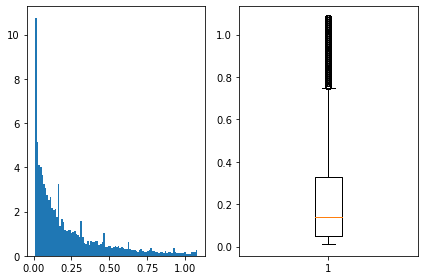

In [391]:
#Task 6
newgs = df.loc[~df.Global_Sales.isin(outlier)]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
ax0.hist(newgs['Global_Sales'], bins=100, density=True);
ax1.boxplot(newgs['Global_Sales']) 
fig.tight_layout()
plt.show()

In [381]:
#Task 7
gsmean1 = np.mean(newgs['Global_Sales'])
gsmedian1 = np.median(newgs['Global_Sales'])
dif = gsmean1 - gsmedian1
print('Difference is', dif)

Difference is 0.09147432845973633


Difference is much more less because there were a lot values with zeros in initial form of the dataset. So, after removing the outliers it widened the difference between mean and median.

## Q2 (1 point)
Consider the set of data below (my_list). Does it appear to approximately follow a normal distribution? Justify your answer.

*Hint: Check for the properties of the Normal distribution and for the graph of distribtuion.*

In [452]:
my_list = [113, 71, 89, 143, 140, 146, 122, 104, 134, 143, 110, 131, 125, 116, 
           164, 107, 113, 122, 119, 116, 98, 161, 128, 152, 116, 83, 86, 155,
           128, 122, 95, 122, 131, 134, 107, 113, 101, 92, 134, 140]

In [453]:
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as stats
import statsmodels.api as sm
import pylab

One of the basic properties of normal distribution says that mean, median and mode are all equal.

In [460]:
#General test
print('Mean:', st.mean(my_list))
print('Mode:', st.mode(my_list))
print('Median:', st.median(my_list))

Mean: 120.65
Mode: 122
Median: 122.0


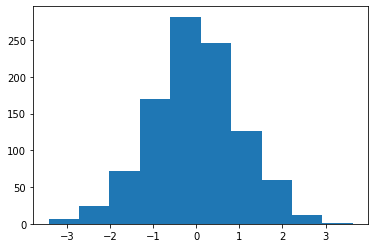

In [179]:
#Histogram test
plt.hist(my_list)
plt.show()

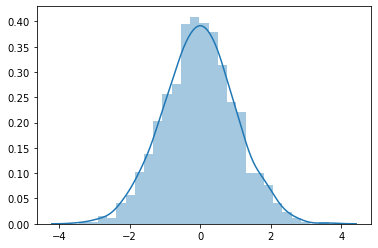

In [184]:
ax = sns.distplot(my_list)

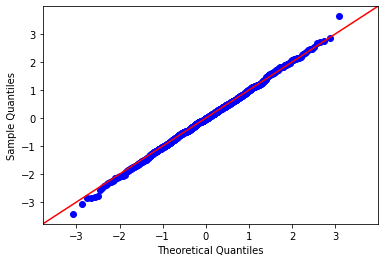

In [119]:
#Quantile test
my_list = stats.norm.rvs(size=1000)
sm.qqplot(my_list, line='45')
pylab.show()

In [120]:
#Shapiro-wilk test
x, p = stats.shapiro(my_list)
print((x, p))
if p > 0.05:
    print('Probably normal')
else:
    print('Probably not normal')

(0.9993802905082703, 0.9900021553039551)
Probably normal


From the performed tests we can see that the given set follows normal distribution.

## Q3 (1 point)
Generate synthetic data (numpy.random.normal) with mean = 100, std = 20 and size = 100000 (round it to nearest integer). 

__Tasks to do:__
1. Plot histogram
2. What is the mean, median and mode
3. Build function to calculate standard deviation using standard Python functionality
4. Calculate std. using your function and compare it with numpy function

In [293]:
mean, stdev = 100, 20
data1 = np.random.normal(mean, stdev, 100000)

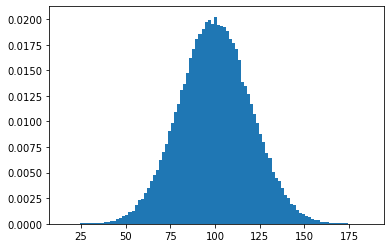

In [301]:
#Task 1
plt.hist(data1, bins=100, density=True);

In [280]:
#Task 2
print(mean)
print(np.median(data))
print(st.mode(data))

100
100.13482825724495
100.32172789755832


In [281]:
#Task 3
mean2 = sum(data) / len(data)
var  = sum(pow(x - mean2, 2) for x in data) / len(data)
std  = var**(1/2)

In [282]:
#Task 4
print(std)
print(np.std(data))

20.020517061434965
20.020517061435


## Q4 (1 point)
Suppose that S is a random variable of the AITU graduates salaries in the first year of work, which is assumed to be normally distributed with the population mean µ = 500 thousand KZT and the population standard deviation σ = 80 thousand KZT. 

**Find the following probabilities:**
1. A graduate will have salary below 450 thousand KZT?
2. A graduate will have salary below the median salary?
3. A graduate will have salary above 660 thousand KZT?
4. A graduate will have salary between 400 and 600 thousand KZT?
5. In a sample of 25 graduates, what percentage of that students will have salary between 480 and 520 thousand KZT?

*Hint: Use SciPy's norm module and write all answers in one cell (using print(command)) for convenience.*

In [523]:
m = 500
s = 80
print('Task 1:', 1 - norm.cdf(450, m, s))
print('Task 2:', 1 - norm.cdf(500, m, s))
print('Task 3:', norm.cdf(660, m, s))
print('Task 4:', norm.cdf(600, m, s) - norm.cdf(400, m, s))
print('Task 5:', norm.cdf(480, m, s) - norm.cdf(520, m, s))

Task 1: 0.7340144709512995
Task 2: 0.5
Task 3: 0.9772498680518208
Task 4: 0.7887004526662893
Task 5: -0.1974126513658474


## Q5 (1 point)
Prove the following expression:

$$Var(X) = E((X-\mu)^2) = E(X^2) - (E(X))^2$$



*Hint: For proof write it down in markdown cell below using LaTex.*

We need to prove this expression:

$$Var(X) = E((X-\mu)^2)$$

Basically, this is the simplified formula of this:
$$E((X-\mu)^2)) = \sum_{i=1}^{N}(xi-\mu)^2pi$$

Let's confirm what expected value of x is equal to:
$$E(X)=\sum_{i=1}^{N}(xi)pi$$

Means that:

$$E(X^2)=\sum_{i=1}^{N}(xi)^2pi$$

what is inside this parentheses is the value you're going to take and multiply by the probability. In our case that value is:

$$(X-\mu)^2$$

Let's try to expand this:

$$E(X^2-2\mu X+\mu^2)$$

$$E(X^2)-2\mu E(X)+\mu^2)$$

$$E(X) = \mu$$

$$E(X^2)-2\mu^2 +\mu^2)$$

$$E(X^2)-\mu^2)$$

$$E(X^2) - (E(X))^2$$

Approved:

$$E((X-\mu)^2) = E(X^2) - (E(X))^2$$

## Bonus question (1 point)
Using NumPy's random library:
1. Write a NumPy program to shuffle numbers between 0 and 10 (inclusive)
2. Write a NumPy program to generate six random integers between 10 and 30
3. Write a program to simulate dice rolling
4. Visualize number of occurences of each side of a die
5. Find probability of getting even number, using simulation

In [470]:
#Task 1
num = np.arange(10)
np.random.shuffle(num)
print(num)
print(np.random.permutation(10))

[9 4 5 6 0 7 8 2 3 1]
[1 8 6 5 7 0 9 3 2 4]


In [473]:
#Task 2
num = np.random.randint(low=10, high=30, size=6)
print(num)

[17 16 29 26 15 22]


In [ ]:
#Task 3
import random as rand
repeat = True
while repeat:
    print("You rolled",rand.randint(1,6))
    print("Do you want to roll again? Y/N")
    repeat = "Y" in input()

## Bonus question 2 (1 point)

Try to simulate all problems from previous question 4, and find probabilities using loops?

In [7]:
# Please, write your code here